In [ ]:
!pip install transformers
!pip install nltk

<h1><b>Google Colab Setup</b></h1>
To use Google Colab effectively, you need to set up the necessary libraries and dependencies. This markdown file provides a step-by-step guide on how to set up a Google Colab environment for a specific task.

## <b>Importing Libraries</b>
First, you need to import the required libraries. Here are some commonly used libraries for various tasks:

In [ ]:
import csv
import requests
import torch
import pandas as pd
import networkx as nx
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re
from string import punctuation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('vader_lexicon')


# **Fetching and Saving Twitter Data**
To scrape Twitter data for HP India products, you can use the following steps:

1. Set the API endpoint URL to `https://twitter135.p.rapidapi.com/Search/`.
2. Define the query parameters for the search, such as the search `query (q)` and the count of tweets to retrieve `(count)`.
3. Set the necessary headers, including the RapidAPI key and host.
4. Make a GET request to the Twitter API using the URL, headers, and query parameters.
5. Check the response status code to ensure a successful request (status code 200).
6. Parse the response JSON to extract the tweets.
7. Open a CSV file named 'Twitter_hp_data.csv' in append mode for writing.
8. Write the header row with the column names: 'Tweet ID' and 'Full Text'.
9. Iterate through the tweets and write the tweet ID and full text to the CSV file.
10. Print a message indicating the successful creation of the CSV file.

In [ ]:
url = "https://twitter135.p.rapidapi.com/Search/"

querystring = {"q": "HP India products", "count": "300"}

headers = {
    "X-RapidAPI-Key": "a7f3acb712msha3f28e95023e89bp1eeb1djsn02828ef9e5c8",
    "X-RapidAPI-Host": "twitter135.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    tweets = data['globalObjects']['tweets']
    with open('Twitter_hp_data.csv', 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Tweet ID', 'Full Text'])

        for tweet_id, tweet_data in tweets.items():
            tweet_id = tweet_id.strip('"')
            full_text = tweet_data.get('full_text', '')
            writer.writerow([tweet_id, full_text])

    print('CSV file created successfully.')
else:
    print('Error:', response.status_code)


# **Fetching and Saving Amazon Reviews**
To scrape Amazon reviews for HP printers, follow these steps:

1. Define an empty list asin_list to store the ASINs of the HP printers.
2. Make a GET request to the Amazon product search API to retrieve the list of HP printers. Use the following endpoint: `https://real-time-amazon-data.p.rapidapi.com/search`. Include the required query parameters for the search, such as the **query, page, country, and category ID. Also, set the necessary headers, including the RapidAPI key and host**.
3. Parse the response JSON to extract the ASINs of the HP printers and append them to the asin_list.
Define an empty dictionary review_list to store the review details.
4. Make a GET request to the Amazon product reviews API for each ASIN in the asin_list. Use the following endpoint: `https://real-time-amazon-data.p.rapidapi.com/product-reviews`. Include the required query parameters, such as the ASIN, country, verified purchases only, images or videos only, page, and page size. Set the necessary headers.
5. Parse the response JSON to extract the review details, including the review ID, title, and comment. Append them to the respective lists in the review_list dictionary.
6. If reviews are not found for a particular ASIN, handle the case and display an appropriate message.
7. Write the review details from the review_list to a CSV file named 'amazon_data.csv'. Include the header row with the column names: 'Review_ID', 'Review_Title', and 'Review_comment'.
8. Print a message indicating the successful creation of the CSV file.

In [ ]:
asin_list = []
review_list = {
    'review_id':[],
    'review_title':[],
    'review_comment':[]
}

def ids():
    global asin_list
    url = "https://real-time-amazon-data.p.rapidapi.com/search"

    querystring = {"query":"HP Printer","page":"1","country":"IN","category_id":"aps"}

    headers = {
    	"X-RapidAPI-Key": "6e2da6e4e9msh190659c30c88efap1d619ejsnb204940846da",
    	"X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()
    product_list = data['data']['products']
    for asin in product_list:
        asin_list.append(asin['asin'])
    print(asin_list)

def reviews():
    url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
    headers = {
        "X-RapidAPI-Key": "6e2da6e4e9msh190659c30c88efap1d619ejsnb204940846da",
        "X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
    }
    for asin in asin_list:
        global review_list
        querystring = {"asin": f"{asin}", "country": "IN", "verified_purchases_only": "false",
                       "images_or_videos_only": "false", "page": "1", "page_size": "1"}
        response = requests.get(url, headers=headers, params=querystring)

        data = response.json()
        # print(data)  # Debug print

        if 'data' in data:
            if 'reviews' in data['data']:
                product_list = data['data']['reviews']
                for ids in product_list:
                    review_list['review_id'].append(ids['review_id'])
                    review_list['review_title'].append(ids['review_title'])
                    review_list['review_comment'].append(ids['review_comment'])
            else:
                print("No reviews found for ASIN:", asin)
        else:
            print("No data found for ASIN:", asin)

    print(review_list)


def csv_data():
    global review_list
    with open('amazon_data.csv', 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Review_ID', 'Review_Title', 'Review_comment'])

        for i in range(len(review_list['review_id'])):
            review_id = review_list['review_id'][i]
            review_title = review_list['review_title'][i]
            review_comment = review_list['review_comment'][i]
            writer.writerow([review_id, review_title, review_comment])
        print('CSV file created successfully.')


ids()
reviews()
csv_data()

# **Preprocessing Twitter and Amazon Data**
To preprocess the Twitter and Amazon data and save the preprocessed data to a new CSV file, you can follow these steps:

1. Read the CSV file into a DataFrame using pd.read_csv('Twitter_and_Amazon_hp_data.csv').
2. Set up the stopwords set and tokenizer using ``stopwords_set = set(ENGLISH_STOP_WORDS)`` and ``vectorizer = TfidfVectorizer()``.
3. Define a preprocessing function to clean the text. This function should remove URLs, convert text to lowercase, remove punctuation, remove stopwords, and join the tokens back into a string.
4. Apply the preprocessing function to the 'Full Text' column of the DataFrame using ``df['Preprocessed Text'] = df['Full Text'].apply(preprocess_text)``.
5. Save the preprocessed data to a new CSV file using ``df.to_csv('preprocessed_data.csv', index=False)``.
6. Print a message indicating the completion of the preprocessing step, such as ``print('Preprocessing complete. Preprocessed data saved to preprocessed_data.csv.')``.

Make sure to have the required libraries installed ``pandas, re, string, and sklearn`` and provide the correct input file path for the Twitter and Amazon data. After running the code, you will have a new CSV file named 'preprocessed_data.csv' containing the preprocessed data..

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Twitter_and_Amazon_hp_data.csv')

# Set up stopwords and tokenizer
stopwords_set = set(ENGLISH_STOP_WORDS)
vectorizer = TfidfVectorizer()

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation
        text = ''.join([c for c in text if c not in punctuation])
        
        # Remove stopwords
        tokens = text.split()
        tokens = [token for token in tokens if token not in stopwords_set]
        
        # Join tokens back into a string
        preprocessed_text = ' '.join(tokens)
        
        return preprocessed_text
    else:
        return ""

# Apply preprocessing to the 'Full Text' column
df['Preprocessed Text'] = df['Full Text'].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)

print('Preprocessing complete. Preprocessed data saved to preprocessed_tweets.csv.')


# **Sentiment Analysis of Preprocessed Data**
To perform sentiment analysis on preprocessed tweets, you can use the following steps:

1. Initialize the sentiment analyzer, such as the VADER sentiment analyzer.
2. Define a function to analyze the sentiment of a given text using the sentiment analyzer. This function should return a sentiment score between -1 (negative) and 1 (positive).
3. Read the preprocessed tweet data from a CSV file into a DataFrame.
4. Access the column containing the preprocessed tweet text from the DataFrame.
5. Iterate over each preprocessed tweet and analyze its sentiment using the analyze_sentiment function.
6. Optionally, print the preprocessed tweet and its corresponding sentiment score for each tweet.
7. Collect the sentiment scores in a list for further analysis or visualization.

Plot a histogram of the sentiment scores to visualize the distribution of sentiment in the preprocessed tweets.

Review: hpindia worst warranty service providing hp india days hearafter personally recommend hp products friends customers
Sentiment score: 0.128

Review: bought hp envy laptop oled touch 16h0028tx midjan 2023 far crashes tech expert came feb 28th replaced motherboard diagnostics test run 710 times hp support team hp worstexperiance hpindia hpsupport
Sentiment score: 0.1531

Review: astitvam don’t allow apple microsoft hp products india karnataka brands allowed sell karnataka gdp fall
Sentiment score: 0.2263

Review: mckinsey product academy offers real actionable insights product leaders register june 2 learn genai sustainability inclusive design revolutionizing product management
Sentiment score: 0.0

Review: hpindia hp hpsupport hpindiamd enriquejlores new fake procedures said entire internal hp crashed need improved restarted systematic hold selling products upgrade jagograhakj
Sentiment score: 0.0

Review: hpindia dont know services going really terrific does new purchased gaming

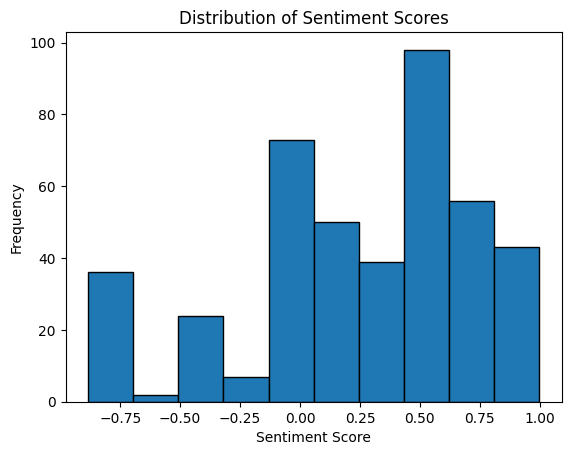

In [14]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyzes the sentiment of the given text using VADER sentiment analysis.
    Returns a sentiment score between -1 (negative) and 1 (positive).
    """
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    return compound_score

# Read the preprocessed data from the CSV file
data = pd.read_csv('preprocessed_data.csv')

# Access the 'review_text' column from the DataFrame
reviews = data['Preprocessed Text'].astype(str)

# Analyze sentiment for each review
for review in reviews:
    sentiment_score = analyze_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment score: {sentiment_score}")
    print()

# Analyze sentiment for each review and collect the scores
sentiment_scores = []
for review in reviews:
    sentiment_score = analyze_sentiment(review)
    sentiment_scores.append(sentiment_score)

# Plot a histogram of the sentiment scores
plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


# **Sentiment Analysis and Knowledge Graph**
This code performs sentiment analysis on new data and visualizes the sentiment scores and entities in a knowledge graph. It follows the following steps:

1. Define the Test Query.
2. Perform sentiment analysis using the VADER sentiment analysis tool.
3. Construct a knowledge graph using the networkx library.
4. Visualize the knowledge graph using the matplotlib library.

The resulting knowledge graph provides insights into the sentiment distribution and relationships between entities and sentiments in the new data.

In [ ]:
# Preprocess the new data and calculate sentiment scores
new_data = [
    "I'm having trouble with the wifi on printer model X.",
    "The printer brand Y is fantastic, never had any issues.",
    "Neutral post about printer model Z.",
]
sentiments = []
entities_occurrences = {}
sentiment_scores = {}

for text in new_data:
    sentiment_score = sid.polarity_scores(text)
    sentiment = 'appreciation' if sentiment_score['compound'] > 0 else 'complain' if sentiment_score['compound'] < 0 else 'suggestion'
    sentiments.append(sentiment)

    # Extract entities from the text
    tokens = nltk.word_tokenize(text)
    entities = [token.lower() for token in tokens if token.isalnum()]
    
    # Count the occurrence of each entity
    for entity in entities:
        entities_occurrences[entity] = entities_occurrences.get(entity, 0) + 1
    
    # Store sentiment scores
    sentiment_scores[sentiment] = sentiment_score['compound']

# Create a graph
G = nx.DiGraph()  # Use DiGraph for directed edges

# Iterate over each data point and its predicted sentiment
for data, sentiment in zip(new_data, sentiments):
    entities = ['wifi', 'printer model X', 'brand Y']  # Modify as needed based on your data

    # Add the sentiment node if it doesn't exist
    if sentiment not in G:
        G.add_node(sentiment, label='Sentiment')

    # Add the entities as nodes if they don't exist
    for entity in entities:
        if entity not in G:
            G.add_node(entity, label='Entity')

    # Add edges between the sentiment and entities with sentiment score as weight
    for entity in entities:
        weight = sentiment_scores[sentiment]
        G.add_edge(entity, sentiment, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(G)

# Set the figure size
plt.figure(figsize=(8, 8))

# Draw nodes and edges
node_colors = {'Sentiment': 'lightgray', 'Entity': 'lightgray', 'appreciation': 'lightgreen', 'suggestion': 'lightblue', 'complain': 'lightpink'}
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[G.nodes[node]['label']] if 'label' in G.nodes[node] else node_colors[node] for node in G.nodes()], node_size=2000)

# Find the sentiment with the highest score
highest_sentiment = max(sentiment_scores, key=sentiment_scores.get)

# Draw edges with the highest sentiment score as weight
for u, v, data in G.edges(data=True):
    weight = data.get('weight', 0)
    if sentiment_scores[highest_sentiment] == max([data.get('weight', 0) for _, _, data in G.edges(data=True)]):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.0, alpha=0.7, arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{weight * 100:.2f}%'}, font_size=8)

nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Set labels and title
plt.xlabel('Entities')
plt.ylabel('Sentiments')
plt.title('Knowledge Graph')

# Show the graph
plt.show()
